In [86]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import seaborn as sns
from sympy import *
import math


import warnings

# Configuration
warnings.simplefilter('ignore')
pd.set_option('max_column', None)
sns.set_style("darkgrid")
colors = sns.color_palette('Set2')


def nominal_interest_rate(e, m):
    n = m*((1 + e)**(1/m) - 1)
    return n

def nominal_interest_rate_continuous(r):
    n = np.log(r + 1)
    return n
    

def present_value(FV, r, n):
    PV = FV/(1+r/100)**n
    return PV


'''
FV = Future Value
r = Interest Rate
n = Number of Periods
'''

def present_value_annuity_due(p, r, n):
#     C + C*[1-(1+i)^-(n-1)]/i]
    pv_a = p + p*(1-(1+r)**((-1)*(n-1)))/r
    return pv_a

'''
C= Cash Flow per period
r = interest rate per period
n =number of period
'''

def annuities_perpetual(p,r,n):
    A = (r*(1+r)**n*(p))/((1+r)**n -1)
    return A 

def pv_perpetual(A, r, n):
    p = A/r*(1-(1/(1+r)**n))
    return p

def pv_factor(a, r, n):
    PVIF= a/(1+r)**n
    return PVIF

'''
where:
a=The future sum to be received
r=The discount interest rate
n=The number of years or other time period
'''



# Bond price and yield to maturity
def bond_price(F, lam, m, n, C):
    p = (F/((1+lam/m)**n)) + C/lam*(1-(1/(1+(lam/m))**n))
    return n


# face_value = 10000
# market_price = 9000
# n = 4
# coupon_payment = 0.05 * 10000
def ytm(face_value, market_price, n, coupon_payment):
    ytm = ((coupon_payment + (face_value-market_price)/ n)) / ((face_value + market_price)/2)
    return ("The YTM for this bond is: " + str(ytm*100) + "%")

'''
n: period
C: yearly coupon payment
F: face value
m: # of coupon payments(C) per year
P: current price of the bond
lam(lambda): yield of maturity
'''
def Macaulay_duration(c, y, m, n):
    D = ((1+y)/m*y) - (1+y+n*(c-y)/m*c*((1+y)**n-1)+ m*y)
    return D

### Q

A debt of $25,000 is to be amortized over 17 years at a 7% annual interest rate under monthly compounding.  What value of monthly payments will achieve this?

Please round your numerical answer to the nearest integer dollar.

In [5]:
annuities_perpetual(25000, 0.07/12, 17*12)

209.91516324002464

### Q

You decide to take out a mortgage to buy a home after graduation. Assume a loan amount of $100,000 for 30 years at a nominal annual interest rate of 12%, compounded monthly.  

What is the total amount of interest that is paid over the course of the 30 years?

Please round your numerical answer to the nearest integer dollar.

In [8]:
monthly_pmt = annuities_perpetual(100000, .12/12, 30*12)
monthly_pmt*360 - 100000

270300.5348931815

### Q

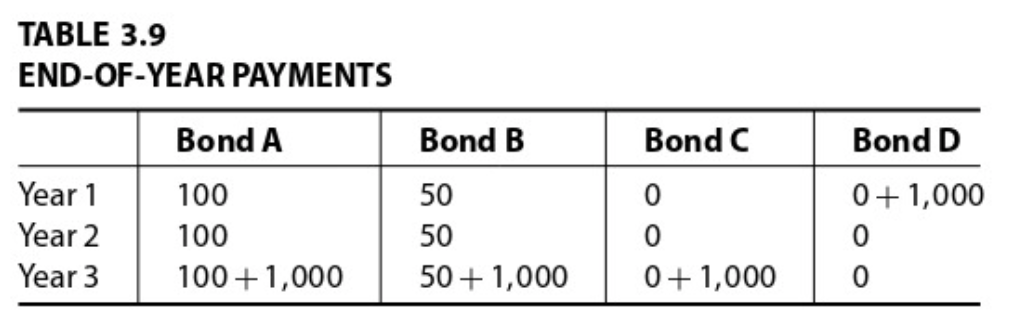

Consider the four bonds having annual payments as shown in Table 3.9. All of the bonds have a 15% yield.

Which bond has the highest price?

### Q

Consider the four bonds having annual payments as shown in Table 3.9. All of the bonds have a 15% yield.

Which bond is the most sensitive to a change in yield?

### Q

Find the duration of a 10-year, 8% bond that is trading at a yield of 10% and pays coupons every 6 months.

Please round your numerical answer to two decimal places.

In [85]:
'''
# of payment: 10*2 = 20
semi-annual ytm = 0.1/2 = .05
par value = 1000 (assume)
semi-annual coupon amt = 0.08*1000/2 = 400
'''

year = [i for i in range(1,22)]
year[-1] = 20
pmt = ones(1,21)*40
pmt[-1] = 1000

new_list = [year, pmt]
df = pd.DataFrame(new_list).transpose()
df.columns = ['year', 'pmt']
df['pv_factor'] = df['pmt']/(1+0.05)**df['year']
npv = sum(df['pv_factor'])
df['weight'] = df['pv_factor']/npv
df['duration'] = (df['weight'] * df['year']) / 2
duration = sum(df['duration'])
print("duration of a 10-year, 8% bond, a yield of 10%, pays coupons every 6 months: ", duration)

df



duration of a 10-year, 8% bond, a yield of 10%, pays coupons every 6 months:  6.84036840893949


,year,pmt,pv_factor,weight,duration
0,1,40,38.0952380952381,0.0435186200660387,0.0217593100330193
1,2,40,36.2811791383220,0.0414463048247987,0.0414463048247987
2,3,40,34.5535039412590,0.0394726712617131,0.0592090068925696
3,4,40,32.9080989916753,0.0375930202492505,0.0751860404985011
4,5,40,31.3410466587384,0.0358028764278577,0.0895071910696441
5,6,40,29.8486158654651,0.0340979775503406,0.102293932651022
6,7,40,28.4272532052049,0.0324742643336577,0.113659925167802
7,8,40,27.0735744811475,0.0309278707939597,0.123711483175839
8,9,40,25.7843566487119,0.0294551150418664,0.132548017688399
9,10,40,24.5565301416304,0.0280524905160633,0.140262452580316
